In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from fuzzywuzzy import process
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [54]:
data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Data_Test.xlsx')

In [55]:
print('Data Shape:',data.shape)
print('Data Shape:',test_data.shape)

Data Shape: (12690, 9)
Data Shape: (4231, 8)


In [56]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [58]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [59]:
# Data exploration for CITY
# CITY has 147 null values
#combining City and locality
data['Location']=data['CITY']+' '+data['LOCALITY']
data.drop(columns=['CITY','LOCALITY'],inplace=True)

In [60]:
data.dropna(subset=['Location'],inplace=True)

In [61]:
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array
  
#Wrong country names dataset

correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]

names_array=match_names(data.Location,correct_names)    

print(len(names_array))
data['Location']=names_array

12577


In [62]:
title_data = data["TITLE"].str.split(",", expand = True)
title_data

,0,1
0,CASUAL DINING,None
1,CASUAL DINING,BAR
2,CASUAL DINING,None
3,QUICK BITES,None
4,DESSERT PARLOR,None
...,...,...
12685,QUICK BITES,None
12686,CASUAL DINING,BAR
12687,LOUNGE,None
12688,CASUAL DINING,None


In [63]:
data["TITLE1"] = title_data[0]
data["TITLE2"] = title_data[1]

In [64]:
data["CUISINES"].str.split(",", expand = True)

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,None,None,None,None,None
1,Asian,Modern Indian,Japanese,None,None,None,None,None
2,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Tibetan,Chinese,None,None,None,None,None,None
4,Desserts,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
12685,North Indian,Burger,Kebab,None,None,None,None,None
12686,Goan,Continental,None,None,None,None,None,None
12687,Finger Food,Continental,Asian,Chinese,None,None,None,None
12688,North Indian,South Indian,Chinese,Street Food,None,None,None,None


In [65]:
data_cuisines = data["CUISINES"].str.split(",", expand = True)
data["CUISINES1"] = data_cuisines[0]
data["CUISINES2"] = data_cuisines[1]
data["CUISINES3"] = data_cuisines[2]
data["CUISINES4"] = data_cuisines[3]
data["CUISINES5"] = data_cuisines[4]
data["CUISINES6"] = data_cuisines[5]
data["CUISINES7"] = data_cuisines[6]
data["CUISINES8"] = data_cuisines[7]
data.drop(columns =["TITLE"], inplace = True) 
data.drop(columns =["CUISINES"], inplace = True)

In [66]:
data[data['RATING'].isna()]


,RESTAURANT_ID,TIME,RATING,VOTES,COST,Location,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8
204,15062,Not Available,NaN,NaN,200,Kochi,BAKERY,None,Bakery,None,None,None,None,None,None,None
421,14127,Not Available,NaN,NaN,350,Hyderabad,CAFÉ,None,Cafe,Fast Food,None,None,None,None,None,None


In [67]:
data['RATING'].fillna(data['RATING'].mode()[0], inplace=True)

In [68]:
data['VOTES'].isna().sum()

1184

In [69]:
data.VOTES.fillna('0',inplace=True)
data['VOTES']=data['VOTES'].str.extract('(\d+)').astype(float)

In [70]:
data=data.drop(columns=['RESTAURANT_ID','TIME'],axis=1)

In [71]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill null values with the most frequent value (mode) for each categorical column
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

## Data Analysis

In [74]:
data.describe()

,VOTES,COST
count,12577.000000,12577.000000
mean,377.741433,656.146219
std,813.888171,628.533438
min,0.000000,20.000000
25%,40.000000,300.000000
50%,133.000000,500.000000
75%,406.000000,800.000000
max,41186.000000,14000.000000


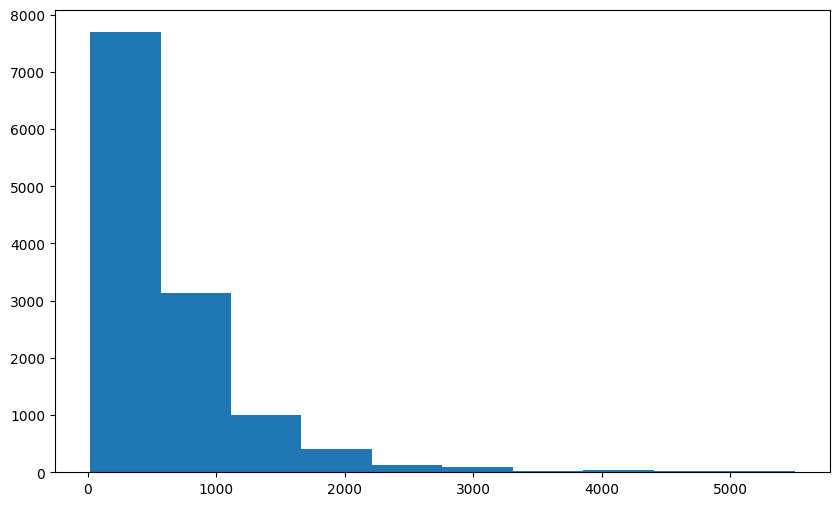

In [78]:
data['COST'].hist(figsize=(10,6), grid=False);

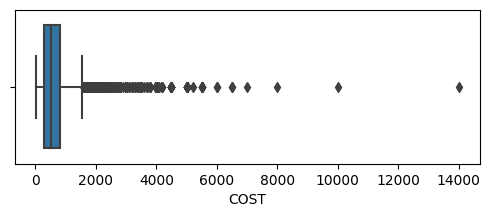

In [76]:
plt.figure(figsize=(6,2))
sns.boxplot(x = data['COST'])
plt.show()

In [77]:
data=data[data['COST']<6000]

In [92]:
data['COST'] = np.cbrt(data['COST'])


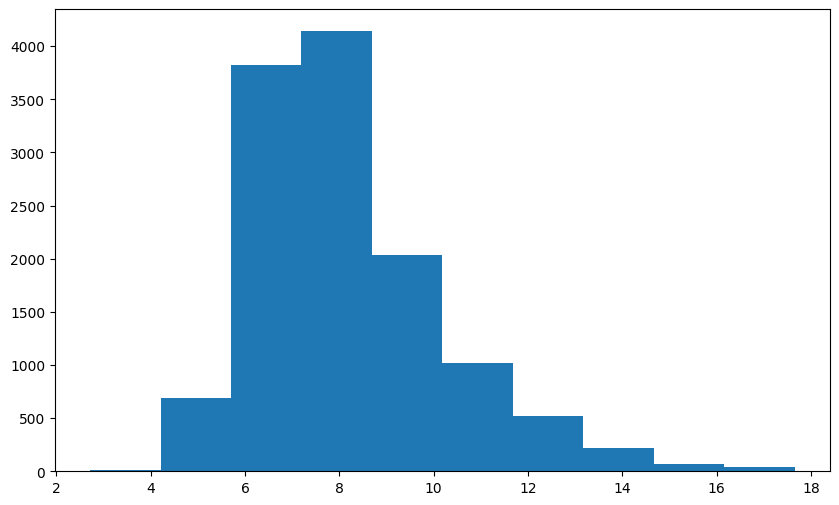

In [93]:
data['COST'].hist(figsize=(10,6), grid=False);

In [79]:
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = label_encoder.fit_transform(data[column])

## Model

In [94]:
X = data.drop("COST",axis=1)
Y = data["COST"]

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

In [96]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [97]:
DT = DecisionTreeRegressor()
model = DT.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 1.11
R-squared (R²): 0.51


In [98]:
rf = RandomForestRegressor()
model = rf.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.82
R-squared (R²): 0.73


In [99]:
xg = XGBRegressor()
model = xg.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.79
R-squared (R²): 0.75


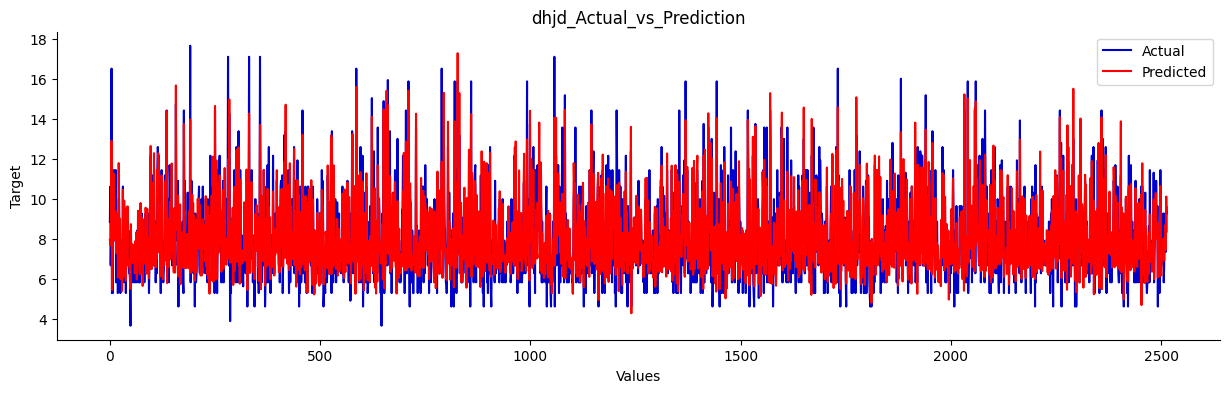

In [100]:
plot_results(Y_test,Y_pred,'dhjd')

In [101]:
# Define the parameters grid for GridSearchCV
param_grid = {
    'n_estimators': [60,80,100,120,150,200],  # Number of boosting rounds
    'max_depth': [3, 5, 7,9,11],           # Maximum tree depth
}

xg = XGBRegressor(tree_method='gpu_hist') 
# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=1)

# Fit GridSearchCV to the data
grid_result = grid_search.fit(X_train, Y_train)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [102]:
# Get the best parameters and the best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MAE): {-best_score:.2f}")

# Use the best model for prediction
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE) for best model: {mae:.2f}')
print(f'R-squared (R²) for best model: {r2:.2f}')


Best Parameters: {'max_depth': 3, 'n_estimators': 200}
Best Score (MAE): 0.79
Mean Absolute Error (MAE) for best model: 0.79
R-squared (R²) for best model: 0.76


In [103]:
# Built-in feature importance (Gini Importance)
importances = best_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

      Feature  Gini Importance
3      TITLE1         0.484019
1       VOTES         0.174615
0      RATING         0.094139
5   CUISINES1         0.045853
4      TITLE2         0.043754
8   CUISINES4         0.040082
7   CUISINES3         0.031611
6   CUISINES2         0.028396
2    Location         0.023468
12  CUISINES8         0.009309
10  CUISINES6         0.009144
9   CUISINES5         0.009013
11  CUISINES7         0.006596


In [ ]:
# removing less important features

In [104]:
feature_imp_df[feature_imp_df['Gini Importance']>0.01]

,Feature,Gini Importance
3,TITLE1,0.484019
1,VOTES,0.174615
0,RATING,0.094139
5,CUISINES1,0.045853
4,TITLE2,0.043754
8,CUISINES4,0.040082
7,CUISINES3,0.031611
6,CUISINES2,0.028396
2,Location,0.023468


In [105]:
cols=feature_imp_df[feature_imp_df['Gini Importance']>0.01]['Feature'].values.tolist()

In [106]:
X_train=X_train[cols]
X_test=X_test[cols]

# Final Training

In [107]:
xg = XGBRegressor(**best_params)
final_model = xg.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test) 

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.79
R-squared (R²): 0.76


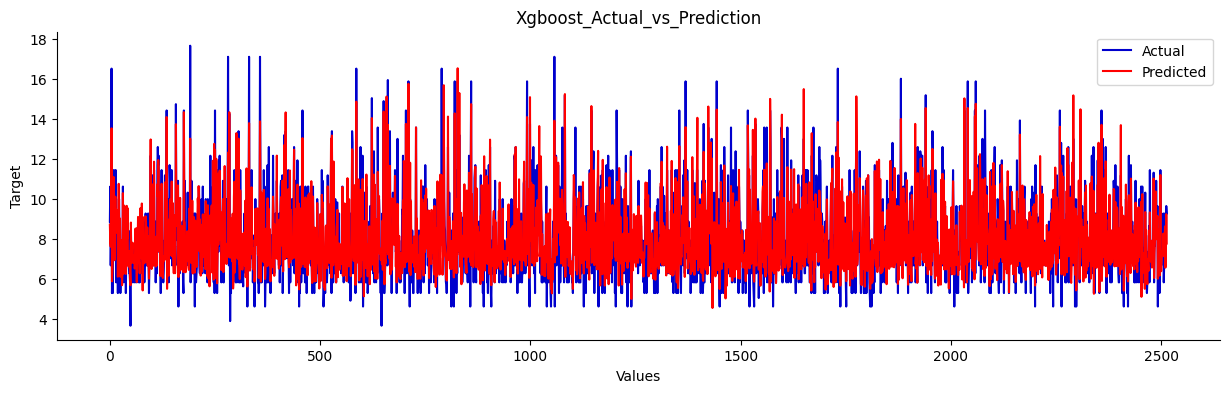

In [108]:
plot_results(Y_test,Y_pred,"Xgboost")

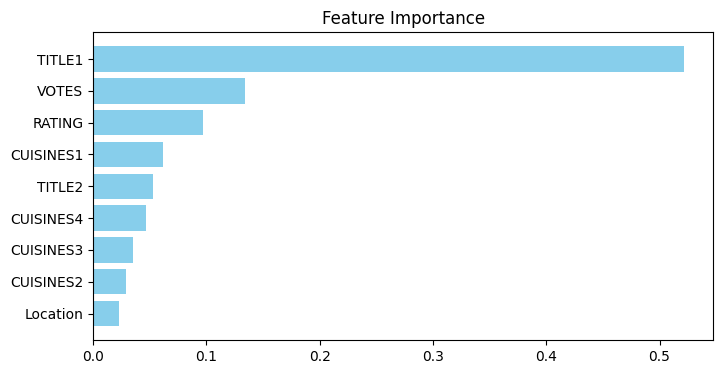

In [109]:
# Built-in feature importance (Gini Importance)
importances = final_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()